# genQC &middot; Generative Quantum Circuits

> Generating quantum circuits with diffusion models

<p align="left">
  <a><img src="https://img.shields.io/badge/python-3.12-red" alt="python-3.12"></a>
  <a href="https://doi.org/10.5281/zenodo.10282060"><img src="https://zenodo.org/badge/DOI/10.5281/zenodo.10282060.svg" alt="DOI"></a>
  <a href="https://florianfuerrutter.github.io/genQC"><img src="https://img.shields.io/badge/Documentation-c" alt="https://florianfuerrutter.github.io/genQC"></a>
  <a href="https://huggingface.co/collections/Floki00/"><img src="https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Models_and_datasets-orange" alt="huggingface.co/collections/Floki00"></a>
  <a href="https://huggingface.co/spaces/Floki00/genQC"><img src="https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Online_Demo-blue" alt="Online_Demo"></a>
</p>

Code repository for generating quantum circuits with diffusion models.

![Generation process for 4-qubit QFT.](https://github.com/FlorianFuerrutter/genQC/blob/main/src/webpage/assets/qft_4qubit_circuit_15s_wpause.gif?raw=true)

<!-- ![Generation process for 4-qubit QFT.](webpage/assets/qft_4qubit_circuit_15s_wpause.gif) -->
<!-- ![](https://github.com/FlorianFuerrutter/genQC/blob/main/src/assets/inference.png?raw=true) -->

## 📰 News

- 🔥 [2025-06-02] Paper release: [Synthesis of discrete-continuous quantum circuits with multimodal diffusion models](https://www.arxiv.org/abs/2506.01666).
- 🔥 [2025-06-01] *Discrete-continuous circuits with multimodal diffusion* - model released on [Hugging Face: huggingface.co/collections/Floki00](https://huggingface.co/collections/Floki00/discrete-continuous-circuits-with-multimodal-diffusion-6839c4e4553e56b957bbd5bf).

## The codebase

The code contained within this repo allows the sampling of pre-trained diffusion models and includes our pipeline to fine-tune and train models from scratch. Pre-trained weights can be found on [[Hugging Face]](https://huggingface.co/collections/Floki00/) and can be downloaded automatically via our code (see minimal example). For the text CLIP model weights we use the [`OpenCLIP`](https://github.com/mlfoundations/open_clip) library, which will download (and cache) the CLIP model on first usage of our pipeline. In case you prefer reading a documentation, rather than notebooks or code, see the project page under [[Documentation]](https://florianfuerrutter.github.io/genQC/).

This repo inlcudes:

1. `genQC/` a full release of our used diffusion pipeline.
2. `src/examples/` examples and tutorials to show how to use the library.
3. `src/` the source notebooks for [`nbdev`](https://github.com/fastai/nbdev).

## Examples

#### Minimal example

A minimal example to compile the 4-qubit Quantum Fourier transform (QFT) unitary, using parameterized circuits.

In [ ]:
import torch
from genQC.pipeline.multimodal_diffusion_pipeline import MultimodalDiffusionPipeline_ParametrizedCompilation
from genQC.inference.sampling import generate_compilation_tensors, decode_tensors_to_backend
from genQC.utils.misc_utils import infer_torch_device, set_seed
from genQC.platform.tokenizer.circuits_tokenizer import CircuitTokenizer
from genQC.benchmark.bench_compilation import SpecialUnitaries
from genQC.platform.simulation import Simulator, CircuitBackendType

device = infer_torch_device()
set_seed(0)

pipeline = MultimodalDiffusionPipeline_ParametrizedCompilation.from_pretrained(
                                repo_id="Floki00/cirdit_multimodal_compile_3to5qubit", 
                                device=device)

pipeline.scheduler.set_timesteps(40) 
pipeline.scheduler_w.set_timesteps(40) 

pipeline.g_h, pipeline.g_w = 0.3, 0.1
pipeline.lambda_h, pipeline.lambda_w = 1.0, 0.35

U = SpecialUnitaries.QFT(num_qubits=4).to(torch.complex64)

out_tensor, params = generate_compilation_tensors(pipeline, 
                          prompt="Compile 4 qubits using: ['h', 'cx', 'ccx', 'swap', 'rx', 'ry', 'rz', 'cp']", 
                          U=U, 
                          samples=8, 
                          system_size=5, 
                          num_of_qubits=4, 
                          max_gates=32)

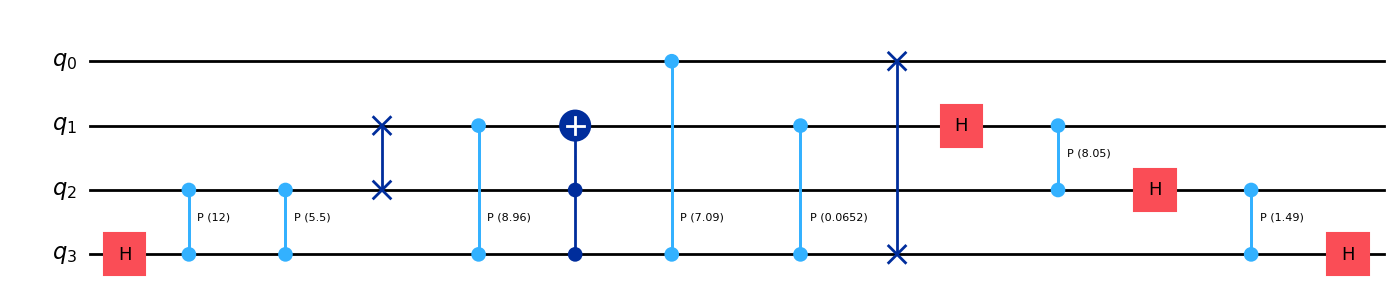

In [ ]:
vocabulary = {g:i+1 for i, g in enumerate(pipeline.gate_pool)} 
tokenizer  = CircuitTokenizer(vocabulary)
simulator  = Simulator(CircuitBackendType.QISKIT)

qc_list, _ = decode_tensors_to_backend(simulator, tokenizer, out_tensor, params)
qc_list[0].draw("mpl")

#### Further examples

More detailed examples and tutorial notebooks are provided on the project page [[tutorials]](https://florianfuerrutter.github.io/genQC/examples/tutorials.html) or in the directory `src/examples/`.

## Installation

The installation of `genQC` is done via `pip` within a few minutes, depending on your downloading speed.

#### Method 1: pip install

To install `genQC` just run:

```sh
pip install genQC
```

Note, this will install missing requirements automatically. You may want to install some of them manually beforehand, e.g. `torch` for specific cuda support, see [https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/).

**Requirements:** `genQC` depends on `python` (min. version 3.12) and the libraries: `torch`, `numpy`, `matplotlib`, `scipy`, `omegaconf`, `qiskit`, `tqdm`, `joblib`, `open_clip_torch`, `ipywidgets`, `pylatexenc`, `safetensors`, `tensordict` and `huggingface_hub`. All can be installed with `pip install`. In `src/RELEASES.md` [[doc]](https://florianfuerrutter.github.io/genQC/RELEASES.html) and the [GitHub release descriptions](https://github.com/FlorianFuerrutter/genQC/releases), specific tested-on versions are listed.

#### Method 2: clone the repository

To use the latest GitHub code, you can clone the repository by running: 

```sh
git clone https://github.com/FlorianFuerrutter/genQC.git
cd genQC
```

The library `genQC` is built using jupyter notebooks and [`nbdev`](https://github.com/fastai/nbdev). To install the library use in the clone directory:

```sh
pip install -e .
```

#### Test installation

You can run the provided `src/examples/Quantum circuit synthesis with diffusion models/0_hello_circuit` [[doc]](https://florianfuerrutter.github.io/genQC/examples/Quantum%20circuit%20synthesis%20with%20diffusion%20models/hello_circuit.html) [[notebook]](https://github.com/FlorianFuerrutter/genQC/blob/main/src/examples/Quantum%20circuit%20synthesis%20with%20diffusion%20models/0_hello_circuit.ipynb) example to test your installation. On a computer with a moderate GPU this inference example notebook should run under half a minute. 

## License

The code and weights in this repository are licensed under the [Apache License 2.0](https://github.com/FlorianFuerrutter/genQC/blob/main/LICENSE.txt).

## BibTeX

We kindly ask you to cite our paper if any of the previous material was useful for your work.

#### Quantum circuit synthesis with diffusion models

``` latex
@article{furrutter2024quantum,
  title={Quantum circuit synthesis with diffusion models},
  author={F{\"u}rrutter, Florian and Mu{\~n}oz-Gil, Gorka and Briegel, Hans J},
  journal={Nature Machine Intelligence},
  doi = {https://doi.org/10.1038/s42256-024-00831-9},
  vol = {6},
  pages = {515-–524},
  pages={1--10},
  year={2024},
  publisher={Nature Publishing Group UK London}
}
```